In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline


from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn import model_selection
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

from mlxtend.evaluate import bias_variance_decomp

In [43]:
#We generate a dataset with 4 features, and two features who are actually informative.

X,y,c = make_regression(n_samples=10000,n_features=4,
                        coef=True,
                        random_state=0)

In [44]:
# Testing on generated data

train_data, test_data, train_lbl, test_lbl = train_test_split( X, y, test_size=1/7.0, random_state=0)

# Without PCA

In [45]:
reg = LinearRegression().fit(train_data, train_lbl)

In [46]:
reg.score(test_data,test_lbl)

1.0

# After PCA

In [47]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(train_data)

# Apply transform to both the training set and the test set.
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [67]:
pca = PCA(0.95)

x_pca = pca.fit(train_data)

x_pca = pca.transform(train_data)

x_pca_test = pca.transform(test_data)

In [49]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 25.63,  50.95,  75.53, 100.  ])

Score for 1 components: 0.5949298577734824
Score for 2 components: 0.9060876616550676
Score for 3 components: 0.9987313374372809
Score for 4 components: 1.0


<function matplotlib.pyplot.show(*args, **kw)>

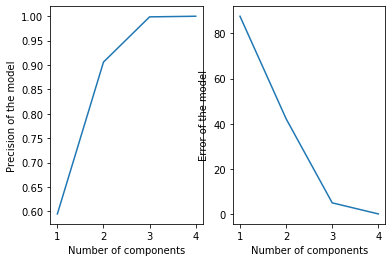

In [99]:
regr = LinearRegression()

scores = []
errors = []

for i in np.arange(1,5):
    regr.fit(x_pca[:,:i], train_lbl)
    
    score = regr.score(x_pca_test[:,:i],test_lbl)                                              
    print("Score for " + str(i) + " components: " + str(score))
    scores.append(score)
    
    pred = regr.predict(x_pca_test[:,:i])
    error = np.sqrt(mean_squared_error(test_lbl,pred))
    errors.append(error)    
    
plt.subplot(1,2,1)
plt.plot(np.arange(1,5),scores)
plt.xlabel('Number of components')
plt.ylabel('Precision of the model')


plt.subplot(1,2,2)
plt.plot(np.arange(1,5),errors)
plt.xlabel('Number of components')
plt.ylabel('Error of the model')

plt.show